In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from src.features.functions import import_data,find_best_threshold, optimize_threshold_for_accuracy, predict_classification
from src.features.plots import plot_confusion_matrix,plot_roc_curve_and_accuracy

In [2]:
X_train, y_train, X_test, y_test = import_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
model = xgb.XGBClassifier(objective ='binary:logistic',)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
y_prob_val = model.predict_proba(X_val)[:, 1]

In [7]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
auc = roc_auc_score(y_val, y_prob_val)

In [8]:
best_threshold, threshold_accuracy = find_best_threshold(fpr, tpr, thresholds, y_val, y_prob_val)

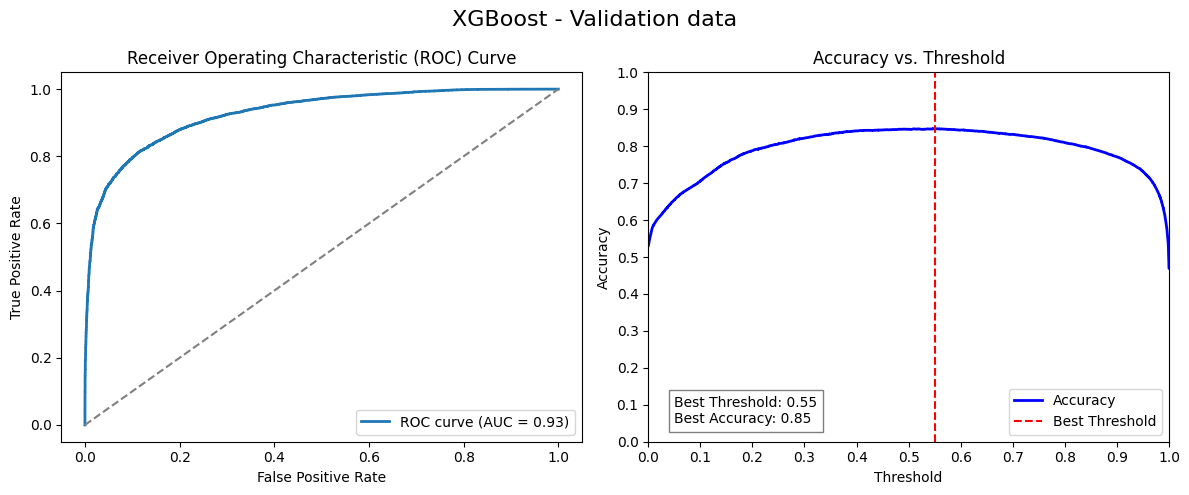

In [9]:
plot_roc_curve_and_accuracy(fpr, tpr, auc, thresholds, y_val, y_prob_val, "XGBoost - Validation data")

In [13]:
optimal_threshold, optimal_accuracy = optimize_threshold_for_accuracy(y_val, y_prob_val)
print(f"Optimal Threshold: {optimal_threshold:.3}, Accuracy: {optimal_accuracy:.3}")

Optimal Threshold: 0.556, Accuracy: 0.847


In [14]:
y_pred = predict_classification(model,X_test,y_test,optimal_threshold,True)

Evaluation metrics:
Accuracy    :	0.851
F1 score    :	0.854
Precision   :	0.897
NVP         :	0.891
Sensitivity :	0.815
Specificity :	0.891


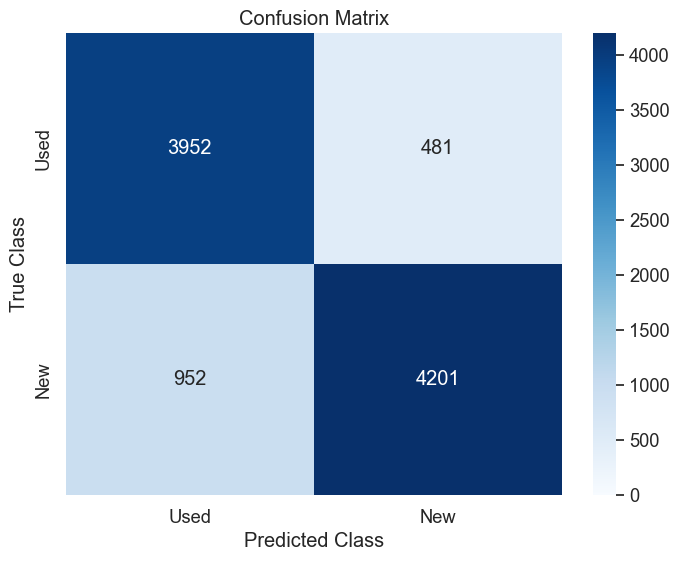

In [16]:
plot_confusion_matrix(y_test, y_pred,False,["Used","New"])